# Mandatory to run

In [ ]:
%pip install pandas
%pip install requests
%pip install tabulate
%pip install seaborn
%pip install plotly

In [1]:
import requests
import json
import pandas as pd
from dateutil.relativedelta import relativedelta

from tabulate import tabulate


def query_db(query: str, query_type: str = "english", export_csv: bool = False):
    url = "https://api.warpy.dev/query"
    headers = {"Content-Type": "application/json"}
    data = json.dumps(
        {"query": query, "type": query_type, "export": "csv" if export_csv else None}
    )
    response = requests.post(url, data=data, headers=headers)

    if response.status_code != 200:
        raise Exception(f"Request failed with status code {response.status_code}")

    return response.json()


def truncate_text(text, max_length=50):
    return text if len(text) <= max_length else text[:max_length] + "..."

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dateutil.relativedelta import relativedelta


# test Queries

In [ ]:
# normal sql query, nothin' fancy
query = "SELECT fid, username FROM users ORDER by fid desc LIMIT 3;"


data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

      fid  registration_date
--  -----  --------------------------
 0  13678  2023-06-08T12:45:50.911000
 1  13677  2023-06-08T12:36:38.800000
 2  13676  2023-06-08T11:42:04.261000


In [ ]:
query = (
    "get user fid and their date of registering in normal date format"
    " orderby fid desc,limit 3"
)

data = query_db(query, query_type="english-advanced")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

      fid  registration_date
--  -----  --------------------------
 0  13551  2023-06-04T23:22:29.052000
 1  13550  2023-06-04T22:33:40.867000
 2  13548  2023-06-04T20:21:14.931000


# Actual Metrics

## Reach

In [3]:
# Daily active users
query = "SELECT count(distinct(author_fid)) as DAU , date(FROM_UNIXTIME(timestamp / 1000)) AS date FROM casts group by date order by date desc limit 365;"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))

In [5]:
df = df[::-1]

In [6]:
df.to_csv("DAU.csv")

In [27]:
df.head(45)

,DAU,date
0,514,2023-06-14
1,544,2023-06-13
2,575,2023-06-12
3,426,2023-06-11
4,456,2023-06-10
5,563,2023-06-09
6,602,2023-06-08
7,588,2023-06-07
8,623,2023-06-06
9,596,2023-06-05


In [7]:
# Monthly active users
query = "SELECT count(distinct(author_fid)), date_format(FROM_UNIXTIME(timestamp / 1000), '%Y-%m') AS date FROM casts group by date order by date desc limit 20;"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))


In [10]:
x = df.head(12)

In [11]:
x = x[::-1]

In [21]:
x = x.head(11)

In [22]:
x

,count(distinct author_fid),date
11,647,2022-07
10,894,2022-08
9,1548,2022-09
8,2737,2022-10
7,3383,2022-11
6,3093,2022-12
5,2661,2023-01
4,2938,2023-02
3,3307,2023-03
2,3225,2023-04


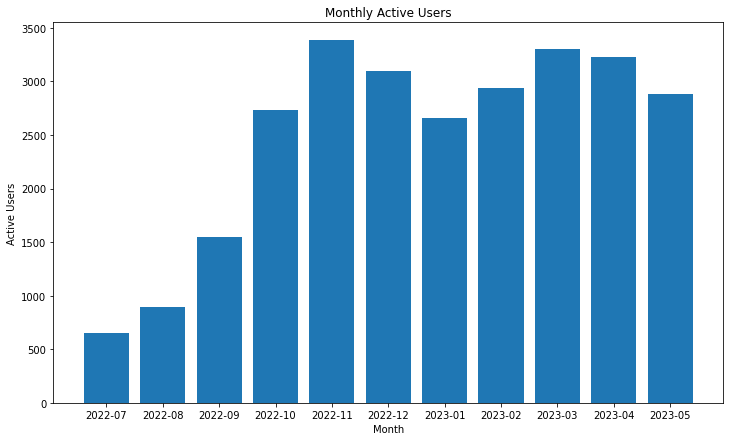

In [23]:
plt.figure(figsize=(12, 7)) 

plt.bar(x['date'], x['count(distinct author_fid)'])

plt.xlabel('Month')
plt.ylabel('Active Users')
plt.title('Monthly Active Users')

plt.show()

Text(0.5, 1.0, 'Monthly Values')

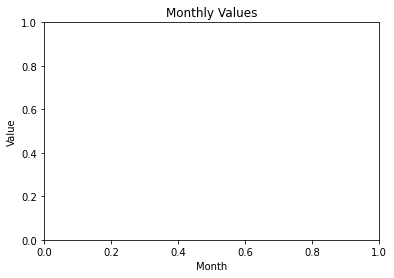

In [14]:
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Values')

In [15]:
plt.show()

In [ ]:
# Total users gained each month - not perfect - don't use

query = "SELECT DATE_format(FROM_UNIXTIME(registered_at / 1000), '%Y-%m') AS registration_Month, COUNT(*) AS total_users_gained FROM users GROUP BY registration_month ORDER BY registration_month desc;"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))


In [47]:
# Total users over time
query = "select max(fid) as users,DATE_format(FROM_UNIXTIME(registered_at / 1000), '%Y-%m') As Month  from users group by month "

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))

In [48]:
df = df[::-1]

In [50]:
df


,users,Month
25,6,2021-05
24,16,2021-06
23,31,2021-07
22,277,2021-11
21,358,2021-12
20,399,2022-01
19,526,2022-03
18,826,2022-06
17,2176,2021-10
16,2177,2022-02


In [51]:
df = df.tail(10)

In [52]:
df

,users,Month
9,2649,2022-09
8,4595,2022-10
7,6389,2022-11
6,7654,2022-12
5,8569,2023-01
4,9968,2023-02
3,11533,2023-03
2,12570,2023-04
1,13493,2023-05
0,13978,2023-06


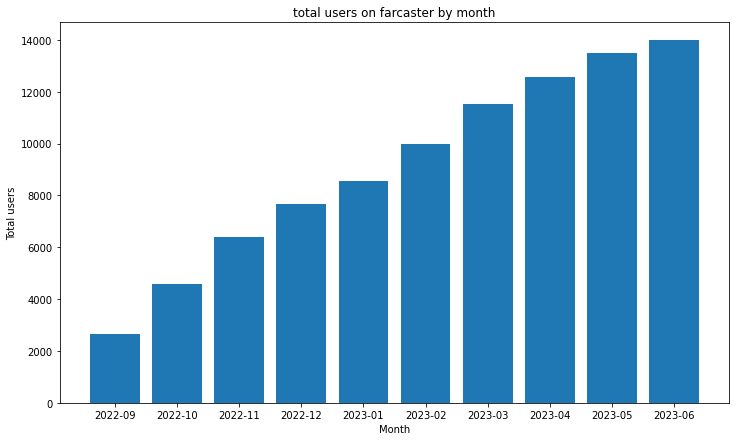

In [54]:
plt.figure(figsize=(12, 7)) 

plt.bar(df['Month'], df['users'])

plt.xlabel('Month')
plt.ylabel('Total users')
plt.title('total users on farcaster by month')

plt.show()

In [66]:
# casts per day
query = "select count(distinct(hash)) as casts,DATE_format(FROM_UNIXTIME(timestamp / 1000), '%Y-%m-%d') As date  from casts group by date order by date desc limit 30"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))

In [67]:
df

,casts,date
0,2135,2023-06-17
1,2921,2023-06-16
2,3299,2023-06-15
3,2969,2023-06-14
4,2722,2023-06-13
5,2770,2023-06-12
6,1866,2023-06-11
7,2075,2023-06-10
8,2858,2023-06-09
9,3303,2023-06-08


In [68]:
df = df[::-1]

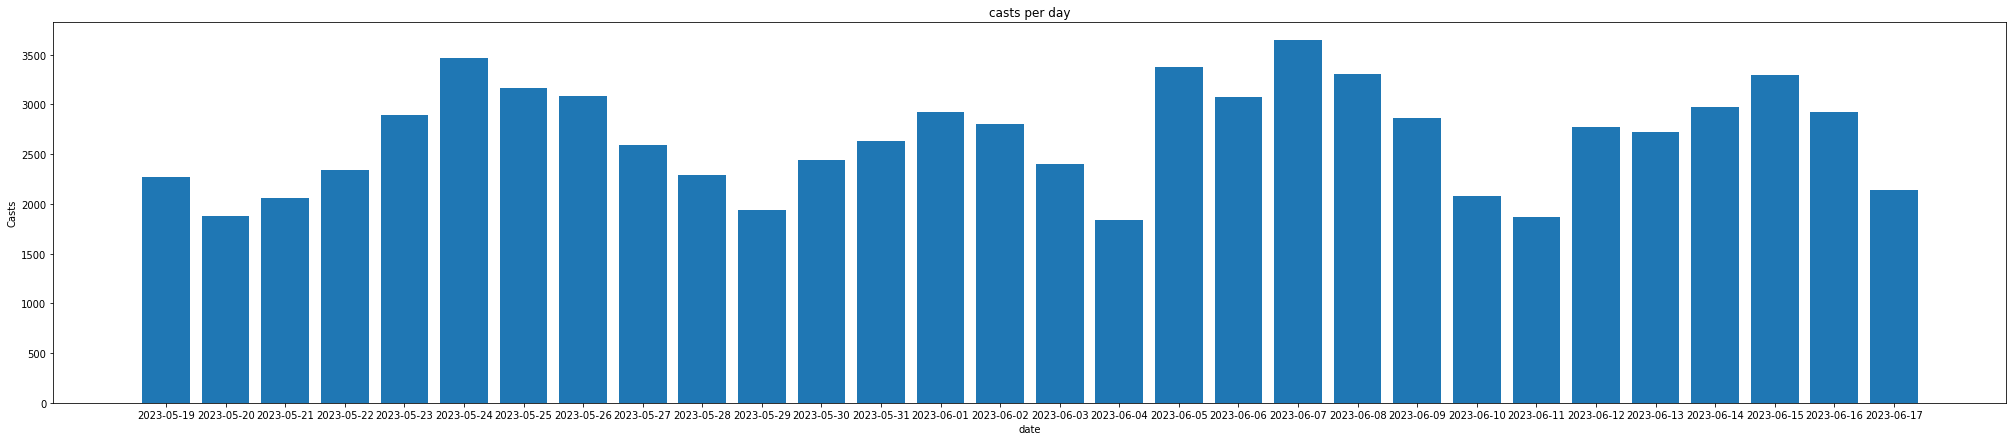

In [70]:
plt.figure(figsize=(35, 7)) 

plt.bar(df['date'], df['casts'])

plt.xlabel('date')
plt.ylabel('Casts')
plt.title('casts per day')

plt.show()

In [71]:
query = "select count(distinct(hash)) as casts,DATE_format(FROM_UNIXTIME(timestamp / 1000), '%Y-%m') As date  from casts group by date order by date desc limit 11"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])

In [73]:
df = df.tail(10)

In [74]:
df

,casts,date
1,77196,2023-05
2,73946,2023-04
3,78399,2023-03
4,65488,2023-02
5,62792,2023-01
6,60791,2022-12
7,78981,2022-11
8,76490,2022-10
9,43275,2022-09
10,26921,2022-08


In [76]:
df = df[::-1]

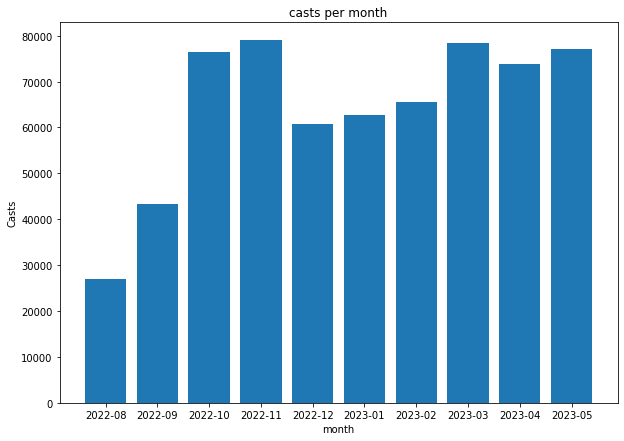

In [77]:
plt.figure(figsize=(10, 7)) 

plt.bar(df['date'], df['casts'])

plt.xlabel('month')
plt.ylabel('Casts')
plt.title('casts per month')

plt.show()

## growth accounting

## Retention

#### rough ideas and work



In [ ]:
# growth metrics - should they be analyzed, where should they be put?

In [ ]:

query = "select distinct(reaction_type) from reactions"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

    reaction_type
--  ---------------
 0  like
 1  recast


In [ ]:
# cohort retention - month of first cast of each user - not working

query = "select timestamp, date_trunc('month' ,timestamp) as month from casts  "

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
# cohort retention - month of first cast of each user
query = "select author_fid,min(DATE_format(FROM_UNIXTIME(c.timestamp / 1000), '%Y-%m')) as date from casts as c group by author_fid  ;"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
# test
query = """
select author_fid,min(DATE_format(FROM_UNIXTIME(c.timestamp / 1000), '%Y-%m')) as date from casts as c group by author_fid  limit 100;
"""
data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
# cohort retention - not working

# casts per day
query = "select DATE_format(FROM_UNIXTIME(timestamp / 1000), '%Y-%m-%d') as dt,min(timestamp) as min, author_fid from casts group by author_fid,min order by min desc limit 100"

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
# cohort retention table - working - following months

q2 = """

SELECT
    c.author_fid,
    period_diff( DATE_FORMAT(FROM_UNIXTIME(c.timestamp / 1000), '%Y%m'), uc.date) AS month_number
FROM
    casts AS c
LEFT JOIN (
    SELECT
        author_fid,
        MIN(DATE_FORMAT(FROM_UNIXTIME(timestamp / 1000), '%Y%m')) AS date
    FROM
        casts
    GROUP BY
        author_fid
) AS uc ON c.author_fid = uc.author_fid
GROUP BY
    c.author_fid, month_number

"""
data = query_db(q2, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
#test
#
query = """
SELECT
    r.cohortMonth,
    s.num_users AS new_users,
    r.month_number,
    r.num_users / s.num_users AS retention
FROM (
    SELECT
        c.date AS cohortMonth,
        o.month_number,
        COUNT(*) AS num_users
    FROM (
        SELECT
            author_fid,
            TIMESTAMPDIFF(MONTH, uc.date, DATE_FORMAT(FROM_UNIXTIME(c.timestamp / 1000), '%Y%m')) AS month_number
        FROM
            casts
        LEFT JOIN (
            SELECT
                author_fid,
                MIN(DATE_FORMAT(FROM_UNIXTIME(timestamp / 1000), '%Y%m')) AS date
            FROM
                casts
            GROUP BY
                author_fid
        ) AS uc ON casts.author_fid = uc.author_fid
        GROUP BY
            author_fid, month_number
    ) AS o
    LEFT JOIN user_cohort c ON o.author_fid = c.author_fid
    GROUP BY
        cohortMonth, month_number
) AS r
LEFT JOIN (
    SELECT
        uc.date AS cohortMonth,
        COUNT(*) AS num_users
    FROM
        user_cohort uc
    GROUP BY
        cohortMonth
    ORDER BY
        cohortMonth
) AS s ON r.cohortMonth = s.cohortMonth
WHERE
    r.month_number != 0
ORDER BY
    r.cohortMonth, r.month_number

"""

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
# cohort retention table - working - following months

q2 = """

select * from casts limit 1000
"""
data = query_db(q2, query_type="raw")
df = pd.DataFrame(data["result"])
df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
print(tabulate(df, headers="keys", tablefmt="outline"))

In [ ]:
# test work
import json
import os

curl = """
curl -X POST \
     -H "Content-Type: application/json" \
     -d '{"type": "english-advanced",
          "query": "get a table with 12 cohort months and their retention after each month"}' \
     https://api.warpy.dev/query
"""

response = json.loads(os.popen(curl).read())

print(response)

## retention method 2

In [34]:
query = "select author_fid,hash,timestamp from casts order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))

In [5]:
df.head()

,author_fid,hash,timestamp
0,3,0xad5fc6bb839c1a9aa1c7d47b1229f802b42cecf1,1620423638886
1,3,0xbf9eef7f967e603c31dc3d2de12343eda4c1df1f,1620427080104
2,3,0xa3827e0e2d2072da35b6d35b86b7c459a3c7cb87,1620593889239
3,3,0x01f31e8c5f15a0e2ce3d0f4758a18eccab003b0b,1620681337187
4,3,0x9105fab0b1d1833fc3956ecc01630a83c62b4ed0,1620687205245


In [6]:
df.tail()

,author_fid,hash,timestamp
99995,18,0x72cdfe9d83082de40c117bd8d1a69a00ed728d37,1662850145716
99996,324,0xd3ed67cb7c31287e657c62bf48ff8e599531bfe0,1662850234955
99997,8,0x01221d17fe6fa1b9cc5594786eae2993957dbe74,1662850370576
99998,8,0x296ab6c148ebe5c75f8f57107db8531c3581e110,1662850386726
99999,431,0x1dddcda6cf619602963e6ac0dc43f97528a4475d,1662850412789


In [35]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1662850412789' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df1 = pd.DataFrame(data["result"])

In [10]:
df1.tail()

,author_fid,hash,timestamp
99995,1484,0x78f17896d66ab7bc169dd0d1ccc0f5abb8865d77,1666903154301
99996,1355,0x9cf98ef05a7b37cdb31a3df4f6bbea84f7d40adf,1666903164951
99997,1401,0x61fcc7b6cff4c7689a9e567978dafc5272b125a2,1666903177791
99998,3731,0x56b8c8c1522f531ae85377e0ec1d3459dabb53ef,1666903186263
99999,4009,0x9e0fca8417a62302dddca8fc94cb5ab1de753203,1666903211686


In [36]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1666903211686' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df2 = pd.DataFrame(data["result"])

In [9]:
df2.tail()

,author_fid,hash,timestamp
99995,3854,0x879d29698d803c9173b6da404656d5575919139b,1670318330176
99996,1349,0xe3ce000136422beacfb82c98ab2633e990428ee9,1670318600867
99997,5708,0xedb546ba3ce40b57d57bf682199a7639b315c776,1670318870852
99998,3747,0x8843979703772b65a5db1df8e4f82a6da17a3980,1670318887304
99999,3426,0x4e65b9a5150649a69b8c20e58ed929d52b3dd55c,1670318897279


In [37]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1670318897279' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df3 = pd.DataFrame(data["result"])

In [ ]:
df3.tail()

,author_fid,hash,timestamp
99995,8401,0x4500918293d199e58c5f1263e8d6b09ea3cad4d1,1674715890963
99996,8401,0x8be691452f66df24d48d5156540e6c592fadc0eb,1674715899714
99997,8401,0x6786605c739c5fe6044d279aa13467520e767fc4,1674715913362
99998,8329,0x1da06ddb3c1ec13392e1885459afe60d2551dae3,1674715915280
99999,8401,0x4f2de7f0efcef1c504a7a60f12fc0e3af90517de,1674715930045


In [38]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1674715930045' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df4 = pd.DataFrame(data["result"])

In [14]:
df4.tail()

,author_fid,hash,timestamp
99995,10351,0xf623c99d0d6f111b9fc5bc20668ff70eb8979130,1678388845000
99996,10587,0xc1b3015c46d1731281ded5db24f7d1c890369a72,1678388854000
99997,3,0x105691be5db760e1ffb291842520c5c8e14dfcd5,1678388858000
99998,129,0x54c7a27e161d27c004e13c0307a0ebd881cf23c3,1678388867000
99999,9890,0x867c36db7f3bd20a28c4af69726f17b72dc3ae70,1678388894000


In [39]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1678388894000' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df5 = pd.DataFrame(data["result"])

In [16]:
df5.tail()

,author_fid,hash,timestamp
99995,10605,0x2e605ed26b84c992978968d10cac54d33c09e74a,1681968909000
99996,10605,0xc1700e114a6adc02b997c973d8c6337bb6956387,1681968912000
99997,10605,0xd67373bcd08c3b72f9666cb747ad3fe92658f5a2,1681968915000
99998,10605,0x6e96277415d662efa4b20e13af04f9347d688374,1681968918000
99999,10605,0xe0478f797f1c3607f65f6d1b0d9c742ba72a95e3,1681968920000


In [40]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1681968920000' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df6 = pd.DataFrame(data["result"])

In [18]:
df6.tail()

,author_fid,hash,timestamp
99995,12319,0x8b8eadaace8af79f83191a7e170a0fe35819958e,1685316718000
99996,12319,0xb737e5d0cc7ec7362241a9f94d7f4420f5c9b99b,1685316718000
99997,8,0x07ce8434ea25e0d802dbca7937dbd849882e466d,1685316735000
99998,472,0xdbdc2410e33faa5292f184aa341c8cef7d1c9d1a,1685316806000
99999,12547,0x8daeeca68214102ad7815cc99a1b06c5a3a9e2d6,1685316822000


In [41]:
query = "select author_fid,hash,timestamp from casts where timestamp > '1685316822000' order by timestamp limit 100000 "

data = query_db(query, query_type="raw")
df7 = pd.DataFrame(data["result"])

In [20]:
df7.tail()

,author_fid,hash,timestamp
40969,429,0x575231f4b80abcf3246aa134af1fda22ad0ba1fc,1686635494000
40970,13607,0xe39cdcf6eb0cce119faf4a3e420ed09c32ae4005,1686635512000
40971,8329,0x68cf46766214a8f1006254f9bfa2ca8ad69edfde,1686635619000
40972,8903,0xe612b9c92217f72f49275c0b2e995cc4e83435be,1686635651000
40973,1325,0x87e0534fefbbca7bceb2cf37f868e5b3c48c5e9a,1686635697000


In [42]:
x = pd.concat([df, df1], axis=0)

In [43]:
x1 = pd.concat([x, df2], axis=0)

In [44]:
x2 = pd.concat([x1, df3], axis=0)

In [45]:
x3 = pd.concat([x2, df4], axis=0)

In [46]:
x4 = pd.concat([x3, df5], axis=0)

In [47]:
x5 = pd.concat([x4, df6], axis=0)

In [48]:
x6 = pd.concat([x5, df7], axis=0)

In [49]:
x6

,author_fid,hash,timestamp
0,3,0xad5fc6bb839c1a9aa1c7d47b1229f802b42cecf1,1620423638886
1,3,0xbf9eef7f967e603c31dc3d2de12343eda4c1df1f,1620427080104
2,3,0xa3827e0e2d2072da35b6d35b86b7c459a3c7cb87,1620593889239
3,3,0x01f31e8c5f15a0e2ce3d0f4758a18eccab003b0b,1620681337187
4,3,0x9105fab0b1d1833fc3956ecc01630a83c62b4ed0,1620687205245
...,...,...,...
44995,312,0x9f8fbf74d9e41ba756876a5bbb09d45672b77f9a,1686772460000
44996,5952,0xf94a6040a351ec2390a93953631687efd55a0d9e,1686772483000
44997,13866,0x0323c64e5c8ce9b41d077b977bfff2860f36c764,1686772511000
44998,312,0x05bdca00edc874f3d1a5e236f70887148e653494,1686772514000


In [21]:
x6.to_csv('casts-15.csv')

In [11]:
x6

NameError: name 'x6' is not defined

In [50]:
x6['timestamp'] = (x6['timestamp'])/1000

In [51]:
x6['date'] = pd.to_datetime(x6['timestamp'],unit='s')

In [24]:
x6

,author_fid,hash,timestamp,date
0,3,0xad5fc6bb839c1a9aa1c7d47b1229f802b42cecf1,1.620424e+09,2021-05-07 21:40:38.885999872
1,3,0xbf9eef7f967e603c31dc3d2de12343eda4c1df1f,1.620427e+09,2021-05-07 22:38:00.104000000
2,3,0xa3827e0e2d2072da35b6d35b86b7c459a3c7cb87,1.620594e+09,2021-05-09 20:58:09.239000064
3,3,0x01f31e8c5f15a0e2ce3d0f4758a18eccab003b0b,1.620681e+09,2021-05-10 21:15:37.187000064
4,3,0x9105fab0b1d1833fc3956ecc01630a83c62b4ed0,1.620687e+09,2021-05-10 22:53:25.244999936
...,...,...,...,...
44995,312,0x9f8fbf74d9e41ba756876a5bbb09d45672b77f9a,1.686772e+09,2023-06-14 19:54:20.000000000
44996,5952,0xf94a6040a351ec2390a93953631687efd55a0d9e,1.686772e+09,2023-06-14 19:54:43.000000000
44997,13866,0x0323c64e5c8ce9b41d077b977bfff2860f36c764,1.686773e+09,2023-06-14 19:55:11.000000000
44998,312,0x05bdca00edc874f3d1a5e236f70887148e653494,1.686773e+09,2023-06-14 19:55:14.000000000


In [52]:
x6['Month'] = x6['date'].dt.strftime('%Y-%m')

In [94]:
x6

,author_fid,hash,timestamp,date,Month
0,3,0xad5fc6bb839c1a9aa1c7d47b1229f802b42cecf1,1.620424e+09,2021-05-07 21:40:38.885999872,2021-05
1,3,0xbf9eef7f967e603c31dc3d2de12343eda4c1df1f,1.620427e+09,2021-05-07 22:38:00.104000000,2021-05
2,3,0xa3827e0e2d2072da35b6d35b86b7c459a3c7cb87,1.620594e+09,2021-05-09 20:58:09.239000064,2021-05
3,3,0x01f31e8c5f15a0e2ce3d0f4758a18eccab003b0b,1.620681e+09,2021-05-10 21:15:37.187000064,2021-05
4,3,0x9105fab0b1d1833fc3956ecc01630a83c62b4ed0,1.620687e+09,2021-05-10 22:53:25.244999936,2021-05
...,...,...,...,...,...
44995,312,0x9f8fbf74d9e41ba756876a5bbb09d45672b77f9a,1.686772e+09,2023-06-14 19:54:20.000000000,2023-06
44996,5952,0xf94a6040a351ec2390a93953631687efd55a0d9e,1.686772e+09,2023-06-14 19:54:43.000000000,2023-06
44997,13866,0x0323c64e5c8ce9b41d077b977bfff2860f36c764,1.686773e+09,2023-06-14 19:55:11.000000000,2023-06
44998,312,0x05bdca00edc874f3d1a5e236f70887148e653494,1.686773e+09,2023-06-14 19:55:14.000000000,2023-06


In [53]:
first_transaction = x6.groupby('author_fid')['Month'].min().reset_index()

In [54]:
first_transaction = first_transaction.rename(columns={'Month': 'cohort_month'})
first_transaction

,author_fid,cohort_month
0,1,2022-12
1,2,2021-05
2,3,2021-05
3,4,2021-05
4,5,2021-08
...,...,...
9441,13867,2023-06
9442,13870,2023-06
9443,13873,2023-06
9444,13874,2023-06


# Rough work - important

In [26]:
#2022-07 - user cohort - for the sake of example

uc = first_transaction.loc[first_transaction['Month'] == '2022-07']



In [27]:
uc

,author_fid,Month
57,58,2022-07
175,181,2022-07
217,226,2022-07
238,248,2022-07
285,298,2022-07
...,...,...
1046,1134,2022-07
1048,1137,2022-07
1049,1138,2022-07
1051,1141,2022-07


In [36]:
x7 = x6[['author_fid','Month']]

In [41]:
# following months

selected_rows = x7[x7['author_fid'].isin(uc['author_fid'])] # selecting only rows with authors fids in cohort 2022-07

following = selected_rows[~selected_rows.duplicated(subset=['author_fid', 'Month'], keep=False)] #selecting only unique values

following

,author_fid,Month
44623,829,2022-07
44630,827,2022-07
44743,830,2022-07
45203,813,2022-07
45207,837,2022-07
...,...,...
26199,871,2023-06
26413,1045,2023-06
30886,989,2023-06
33068,375,2023-06


In [55]:
following

,author_fid,Month,c_month
44623,829,2022-07,2022-07
44630,827,2022-07,2022-07
44743,830,2022-07,2022-07
45203,813,2022-07,2022-07
45207,837,2022-07,2022-07
...,...,...,...
26199,871,2023-06,2022-07
26413,1045,2023-06,2022-07
30886,989,2023-06,2022-07
33068,375,2023-06,2022-07


In [43]:
following['c_month'] = '2022-07'

C:\Users\hp\AppData\Local\Temp\ipykernel_18600\2118681797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  following['c_month'] = '2022-07'


In [ ]:
# subtracting months

for i in range(len(following)):
    
    #print(following['Month'].iloc[i])
    following['c_month'].iloc[i] = relativedelta(pd.to_datetime(following['Month'].iloc[i]),pd.to_datetime(following['c_month'].iloc[i])).months

#following['m_number'] = relativedelta(pd.to_datetime(following['Month']),pd.to_datetime(following['c_month'])).months

In [60]:
following

,author_fid,Month,c_month
44623,829,2022-07,0
44630,827,2022-07,0
44743,830,2022-07,0
45203,813,2022-07,0
45207,837,2022-07,0
...,...,...,...
26199,871,2023-06,11
26413,1045,2023-06,11
30886,989,2023-06,11
33068,375,2023-06,11


In [57]:
#a = uc.iloc[0, 1]
#b = uc.iloc[1,1]


In [59]:
#print(a)

2022-07


In [49]:
# test - important

from dateutil.relativedelta import relativedelta
'''
# Calculate month difference
month_diff = relativedelta(pd.to_datetime(uc['Month'].iloc[0]),pd.to_datetime(uc['Month'].iloc[1])).months

# Print the result
print(month_diff)
'''

0


In [102]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
following['cohort_m'] = '2022-07'

C:\Users\hp\AppData\Local\Temp\ipykernel_18600\1803584978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  following['cohort_m'] = '2022-07'


In [83]:
following

,author_fid,Month,c_month,cohort_m
44623,829,2022-07,0,2022-07
44630,827,2022-07,0,2022-07
44743,830,2022-07,0,2022-07
45203,813,2022-07,0,2022-07
45207,837,2022-07,0,2022-07
...,...,...,...,...
26199,871,2023-06,11,2022-07
26413,1045,2023-06,11,2022-07
30886,989,2023-06,11,2022-07
33068,375,2023-06,11,2022-07


In [91]:
type(following)

pandas.core.frame.DataFrame

In [95]:
grouping = following.groupby(['cohort_m','c_month'])

In [96]:
type(grouping)

pandas.core.groupby.generic.DataFrameGroupBy

In [97]:
cohort_data = grouping['author_fid'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
type(cohort_data)

pandas.core.frame.DataFrame

In [98]:
cohort_counts = cohort_data.pivot(index='cohort_m', columns = 'c_month',values = 'author_fid')

In [99]:
cohort_data

,cohort_m,c_month,author_fid
0,2022-07,0,62
1,2022-07,1,32
2,2022-07,2,29
3,2022-07,3,26
4,2022-07,4,29
5,2022-07,5,28
6,2022-07,6,25
7,2022-07,7,32
8,2022-07,8,20
9,2022-07,9,19


In [114]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100




c_month,0,1,2,3,4,5,6,7,8,9,10,11
cohort_m,,,,,,,,,,,,
2022-07,100.0,51.6,46.8,41.9,46.8,45.2,40.3,51.6,32.3,30.6,22.6,21.0


In [106]:
'''
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

'''

NameError: name 'average_standard_cost' is not defined

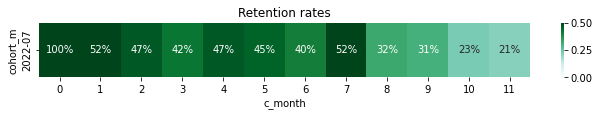

In [115]:
plt.figure(figsize=(11, 1))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap = 'BuGn')
plt.show()

# 1- Retention Table - users

In [61]:
x7 = x6[['author_fid','Month']]

In [62]:
first_transaction

,author_fid,cohort_month
0,1,2022-12
1,2,2021-05
2,3,2021-05
3,4,2021-05
4,5,2021-08
...,...,...
9441,13867,2023-06
9442,13870,2023-06
9443,13873,2023-06
9444,13874,2023-06


In [63]:
following = pd.merge(x7, first_transaction, on='author_fid')

In [64]:
following

,author_fid,Month,cohort_month
0,3,2021-05,2021-05
1,3,2021-05,2021-05
2,3,2021-05,2021-05
3,3,2021-05,2021-05
4,3,2021-05,2021-05
...,...,...,...
744995,13874,2023-06,2023-06
744996,13874,2023-06,2023-06
744997,13874,2023-06,2023-06
744998,13877,2023-06,2023-06


In [65]:
selected = following[~following.duplicated(subset=['author_fid', 'Month','cohort_month'])] #selecting only unique values


In [66]:
selected['cohort_index'] = None

C:\Users\hp\AppData\Local\Temp\ipykernel_23140\2651279003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['cohort_index'] = None


In [67]:
#trimming old cohorts

months = ['2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2023-06']
month2 = ['2023-06']
filtered = selected[~selected['cohort_month'].isin(months)]
filtered = filtered[~filtered['Month'].isin(month2)]


In [68]:
selected

,author_fid,Month,cohort_month,cohort_index
0,3,2021-05,2021-05,None
49,3,2021-06,2021-05,None
122,3,2021-07,2021-05,None
215,3,2021-08,2021-05,None
733,3,2021-09,2021-05,None
...,...,...,...,...
744993,12971,2023-06,2023-06,None
744994,13870,2023-06,2023-06,None
744995,13874,2023-06,2023-06,None
744998,13877,2023-06,2023-06,None


In [69]:
filtered

,author_fid,Month,cohort_month,cohort_index
227761,629,2022-06,2022-06,None
227792,629,2022-07,2022-06,None
227810,629,2022-08,2022-06,None
227865,629,2022-09,2022-06,None
227924,629,2022-10,2022-06,None
...,...,...,...,...
742544,13175,2023-05,2023-05,None
742550,13403,2023-05,2023-05,None
742551,13489,2023-05,2023-05,None
742557,13490,2023-05,2023-05,None


In [70]:

for i in range(len(filtered)):
    
    #print(following['Month'].iloc[i])
    filtered['cohort_index'].iloc[i] = relativedelta(pd.to_datetime(filtered['Month'].iloc[i]),pd.to_datetime(filtered['cohort_month'].iloc[i])).months

C:\Users\hp\AppData\Local\Temp\ipykernel_23140\2387869007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['cohort_index'].iloc[i] = relativedelta(pd.to_datetime(filtered['Month'].iloc[i]),pd.to_datetime(filtered['cohort_month'].iloc[i])).months


In [71]:
grouping = filtered.groupby(['cohort_month','cohort_index'])

In [72]:
cohort_data = grouping['author_fid'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
type(cohort_data)

pandas.core.frame.DataFrame

In [73]:
cohort_counts = cohort_data.pivot(index='cohort_month', columns = 'cohort_index',values = 'author_fid')

In [74]:
cohort_counts

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2022-06,152.0,104.0,94.0,100.0,104.0,85.0,73.0,73.0,68.0,67.0,61.0,55.0
2022-07,264.0,189.0,165.0,169.0,156.0,138.0,118.0,124.0,100.0,95.0,83.0,NaN
2022-08,308.0,202.0,180.0,165.0,138.0,123.0,112.0,107.0,99.0,84.0,NaN,NaN
2022-09,752.0,527.0,409.0,322.0,268.0,240.0,241.0,220.0,196.0,NaN,NaN,NaN
2022-10,1438.0,854.0,570.0,434.0,382.0,361.0,329.0,293.0,NaN,NaN,NaN,NaN
2022-11,1396.0,720.0,467.0,424.0,396.0,355.0,293.0,NaN,NaN,NaN,NaN,NaN
2022-12,871.0,383.0,290.0,279.0,247.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01,550.0,286.0,218.0,201.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,771.0,403.0,302.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
type(cohort_counts)

pandas.core.frame.DataFrame

In [75]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2022-06,100.0,68.4,61.8,65.8,68.4,55.9,48.0,48.0,44.7,44.1,40.1,36.2
2022-07,100.0,71.6,62.5,64.0,59.1,52.3,44.7,47.0,37.9,36.0,31.4,NaN
2022-08,100.0,65.6,58.4,53.6,44.8,39.9,36.4,34.7,32.1,27.3,NaN,NaN
2022-09,100.0,70.1,54.4,42.8,35.6,31.9,32.0,29.3,26.1,NaN,NaN,NaN
2022-10,100.0,59.4,39.6,30.2,26.6,25.1,22.9,20.4,NaN,NaN,NaN,NaN
2022-11,100.0,51.6,33.5,30.4,28.4,25.4,21.0,NaN,NaN,NaN,NaN,NaN
2022-12,100.0,44.0,33.3,32.0,28.4,20.8,NaN,NaN,NaN,NaN,NaN,NaN
2023-01,100.0,52.0,39.6,36.5,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,100.0,52.3,39.2,28.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


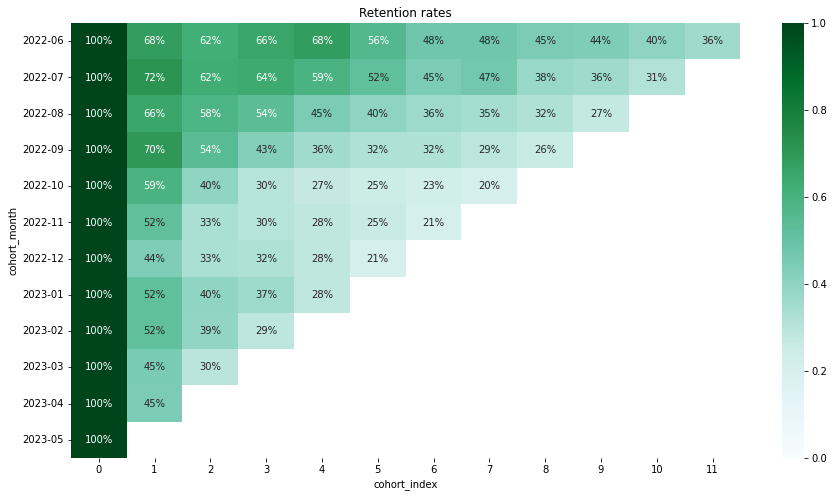

In [80]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True,fmt = '.0%',vmin = 0.0,vmax = 1,cmap = 'BuGn')
plt.show()

### Retention chart - users

In [ ]:
res = retention.round(3)*100
res

In [93]:
res.to_csv('retention.csv')

In [ ]:
# main chart in test.ipynb

# Retention Table - Casts

In [81]:
x8 = x6[['author_fid','hash','Month']]

In [83]:
x8

,author_fid,hash,Month
0,3,0xad5fc6bb839c1a9aa1c7d47b1229f802b42cecf1,2021-05
1,3,0xbf9eef7f967e603c31dc3d2de12343eda4c1df1f,2021-05
2,3,0xa3827e0e2d2072da35b6d35b86b7c459a3c7cb87,2021-05
3,3,0x01f31e8c5f15a0e2ce3d0f4758a18eccab003b0b,2021-05
4,3,0x9105fab0b1d1833fc3956ecc01630a83c62b4ed0,2021-05
...,...,...,...
44995,312,0x9f8fbf74d9e41ba756876a5bbb09d45672b77f9a,2023-06
44996,5952,0xf94a6040a351ec2390a93953631687efd55a0d9e,2023-06
44997,13866,0x0323c64e5c8ce9b41d077b977bfff2860f36c764,2023-06
44998,312,0x05bdca00edc874f3d1a5e236f70887148e653494,2023-06


In [ ]:
first_transaction

In [57]:
followingc = pd.merge(x8, first_transaction, on='author_fid')

In [58]:
followingc

,author_fid,hash,Month,cohort_month
0,3,0xad5fc6bb839c1a9aa1c7d47b1229f802b42cecf1,2021-05,2021-05
1,3,0xbf9eef7f967e603c31dc3d2de12343eda4c1df1f,2021-05,2021-05
2,3,0xa3827e0e2d2072da35b6d35b86b7c459a3c7cb87,2021-05,2021-05
3,3,0x01f31e8c5f15a0e2ce3d0f4758a18eccab003b0b,2021-05,2021-05
4,3,0x9105fab0b1d1833fc3956ecc01630a83c62b4ed0,2021-05,2021-05
...,...,...,...,...
744995,13874,0x491faccb71e9088eb007523dab74affbfc3e6430,2023-06,2023-06
744996,13874,0x8ac10c134730e42e2f184b3cece8b54ede0a8df0,2023-06,2023-06
744997,13874,0x026e86fda27bfc9000872875db31b5795d1db3c7,2023-06,2023-06
744998,13877,0x0e2ddc7e08596d714ffab4d519f8bf9074deaa69,2023-06,2023-06


In [59]:
followingc['cohort_index'] = None

In [60]:
followingc = followingc.drop('Cohort_index', axis=1)

KeyError: "['Cohort_index'] not found in axis"

In [ ]:

months = ['2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2023-06']
month2 = ['2023-06']
filteredc = followingc[~followingc['cohort_month'].isin(months)]
filteredc = filteredc[~filteredc['Month'].isin(month2)]


In [84]:
filteredc

NameError: name 'filteredc' is not defined

In [116]:

for i in range(len(filteredc)):
    
    #print(following['Month'].iloc[i])
    filteredc['cohort_index'].iloc[i] = relativedelta(pd.to_datetime(filteredc['Month'].iloc[i]),pd.to_datetime(filteredc['cohort_month'].iloc[i])).months

C:\Users\hp\AppData\Local\Temp\ipykernel_19500\207247143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredc['cohort_index'].iloc[i] = relativedelta(pd.to_datetime(filteredc['Month'].iloc[i]),pd.to_datetime(filteredc['cohort_month'].iloc[i])).months


In [117]:
filteredc

,author_fid,hash,Month,cohort_month,cohort_index
227761,629,0x47879e1b2f1c829556828660ab9f45a1274b546a,2022-06,2022-06,0
227762,629,0xd466bbae149ea4a659ad8c7dad96557cafb94587,2022-06,2022-06,0
227763,629,0xbe661156a5340343d6712e3fc56f3420e6c92e63,2022-06,2022-06,0
227764,629,0x9a4941bb3b5deb623c786c8d92d18c0f9a9b2b6e,2022-06,2022-06,0
227765,629,0x5d33dc3743f13cfb118effb21ad8e904fa14d283,2022-06,2022-06,0
...,...,...,...,...,...
742559,13468,0xd1b5ba79c784a97f0599c49e749af3af101c610b,2023-05,2023-05,0
742560,13468,0x65866543dadf47b86c85e799fb4dc1e952e48e8d,2023-05,2023-05,0
742561,13468,0x980bebdc2882dcf73327b585c1b1e9eee0049bc1,2023-05,2023-05,0
742562,13468,0x114d2e9c9bc5df843bdb0f93bdd0e142f57d61d3,2023-05,2023-05,0


In [123]:
filteredc.to_csv("filtered.csv")

In [85]:
filteredc = pd.read_csv("filtered.csv")

In [86]:
filteredc

,Unnamed: 0,author_fid,hash,Month,cohort_month,cohort_index
0,227761,629,0x47879e1b2f1c829556828660ab9f45a1274b546a,2022-06,2022-06,0
1,227762,629,0xd466bbae149ea4a659ad8c7dad96557cafb94587,2022-06,2022-06,0
2,227763,629,0xbe661156a5340343d6712e3fc56f3420e6c92e63,2022-06,2022-06,0
3,227764,629,0x9a4941bb3b5deb623c786c8d92d18c0f9a9b2b6e,2022-06,2022-06,0
4,227765,629,0x5d33dc3743f13cfb118effb21ad8e904fa14d283,2022-06,2022-06,0
...,...,...,...,...,...,...
486861,742559,13468,0xd1b5ba79c784a97f0599c49e749af3af101c610b,2023-05,2023-05,0
486862,742560,13468,0x65866543dadf47b86c85e799fb4dc1e952e48e8d,2023-05,2023-05,0
486863,742561,13468,0x980bebdc2882dcf73327b585c1b1e9eee0049bc1,2023-05,2023-05,0
486864,742562,13468,0x114d2e9c9bc5df843bdb0f93bdd0e142f57d61d3,2023-05,2023-05,0


In [87]:
filteredc['count'] = 1

In [88]:
grouping = filteredc.groupby(['cohort_month','cohort_index','author_fid'])

In [89]:
cohort_data = grouping['count'].apply(pd.Series.sum)
cohort_data = cohort_data.reset_index()
type(cohort_data)

pandas.core.frame.DataFrame

In [138]:
cohort_data

,cohort_month,cohort_index,author_fid,count
0,2022-06,0,193,15
1,2022-06,0,213,1
2,2022-06,0,268,3
3,2022-06,0,277,1
4,2022-06,0,443,5
...,...,...,...,...
24558,2023-05,0,13474,1
24559,2023-05,0,13476,2
24560,2023-05,0,13478,2
24561,2023-05,0,13489,3


In [90]:
cohort_data

,cohort_month,cohort_index,author_fid,count
0,2022-06,0,193,15
1,2022-06,0,213,1
2,2022-06,0,268,3
3,2022-06,0,277,1
4,2022-06,0,443,5
...,...,...,...,...
24558,2023-05,0,13474,1
24559,2023-05,0,13476,2
24560,2023-05,0,13478,2
24561,2023-05,0,13489,3


In [91]:
grouping = cohort_data.groupby(['cohort_month','cohort_index'])

In [92]:
cohort_data = grouping['count'].apply(pd.Series.sum)
cohort_data = cohort_data.reset_index()

In [93]:
cohort_data

,cohort_month,cohort_index,count
0,2022-06,0,1656
1,2022-06,1,2334
2,2022-06,2,2434
3,2022-06,3,2548
4,2022-06,4,3895
...,...,...,...
73,2023-03,1,10847
74,2023-03,2,6971
75,2023-04,0,6471
76,2023-04,1,8304


In [94]:
cohort_counts = cohort_data.pivot(index='cohort_month', columns = 'cohort_index',values = 'count')

In [95]:
cohort_counts

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2022-06,1656.0,2334.0,2434.0,2548.0,3895.0,2675.0,1536.0,1443.0,1139.0,1250.0,995.0,1142.0
2022-07,3711.0,3996.0,5226.0,6986.0,4894.0,4007.0,2783.0,2698.0,3485.0,3114.0,5096.0,NaN
2022-08,5990.0,7386.0,9012.0,6082.0,4725.0,4270.0,3675.0,3697.0,3045.0,3373.0,NaN,NaN
2022-09,10925.0,18275.0,11650.0,6864.0,7254.0,6655.0,8130.0,6134.0,6176.0,NaN,NaN,NaN
2022-10,18693.0,15797.0,9341.0,8335.0,10029.0,9274.0,8000.0,6149.0,NaN,NaN,NaN,NaN
2022-11,19250.0,11471.0,9432.0,9614.0,10736.0,9374.0,10107.0,NaN,NaN,NaN,NaN,NaN
2022-12,8175.0,5540.0,4813.0,5174.0,3334.0,3760.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01,5881.0,5106.0,4683.0,3863.0,3896.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,6438.0,5984.0,3373.0,2407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2022-06,100.0,140.9,147.0,153.9,235.2,161.5,92.8,87.1,68.8,75.5,60.1,69.0
2022-07,100.0,107.7,140.8,188.3,131.9,108.0,75.0,72.7,93.9,83.9,137.3,NaN
2022-08,100.0,123.3,150.5,101.5,78.9,71.3,61.4,61.7,50.8,56.3,NaN,NaN
2022-09,100.0,167.3,106.6,62.8,66.4,60.9,74.4,56.1,56.5,NaN,NaN,NaN
2022-10,100.0,84.5,50.0,44.6,53.7,49.6,42.8,32.9,NaN,NaN,NaN,NaN
2022-11,100.0,59.6,49.0,49.9,55.8,48.7,52.5,NaN,NaN,NaN,NaN,NaN
2022-12,100.0,67.8,58.9,63.3,40.8,46.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01,100.0,86.8,79.6,65.7,66.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,100.0,92.9,52.4,37.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


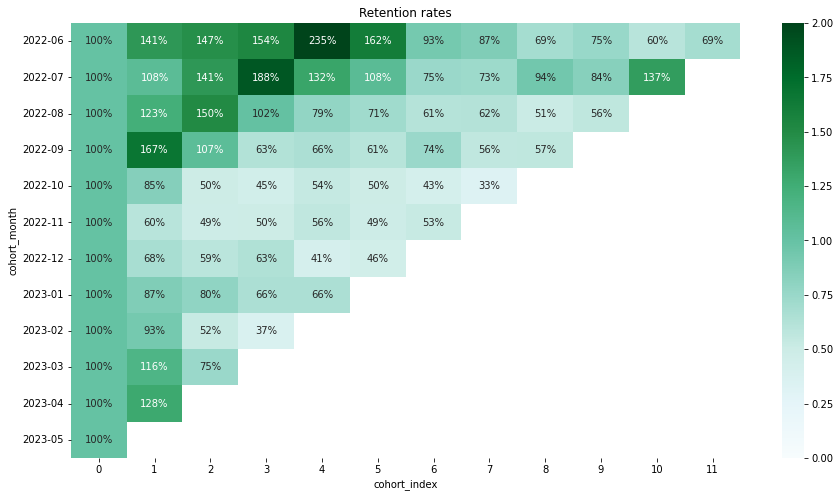

In [97]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True,fmt = '.0%',vmin = 0.0,vmax = 2,cmap = 'BuGn')
plt.show()

In [147]:
res = retention.round(3)*100
res

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2022-06,100.0,140.9,147.0,153.9,235.2,161.5,92.8,87.1,68.8,75.5,60.1,69.0
2022-07,100.0,107.7,140.8,188.3,131.9,108.0,75.0,72.7,93.9,83.9,137.3,NaN
2022-08,100.0,123.3,150.5,101.5,78.9,71.3,61.4,61.7,50.8,56.3,NaN,NaN
2022-09,100.0,167.3,106.6,62.8,66.4,60.9,74.4,56.1,56.5,NaN,NaN,NaN
2022-10,100.0,84.5,50.0,44.6,53.7,49.6,42.8,32.9,NaN,NaN,NaN,NaN
2022-11,100.0,59.6,49.0,49.9,55.8,48.7,52.5,NaN,NaN,NaN,NaN,NaN
2022-12,100.0,67.8,58.9,63.3,40.8,46.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01,100.0,86.8,79.6,65.7,66.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02,100.0,92.9,52.4,37.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
res.to_csv('retentioncasts.csv')

# DAU/MAU stickiness ratio

In [4]:

# Daily active users
query = "SELECT count(distinct(author_fid)) as DAU , date(FROM_UNIXTIME(timestamp / 1000)) AS date FROM casts group by date order by date desc limit 365;"

data = query_db(query, query_type="raw")
DAU = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))

In [6]:

# Monthly active users
query = "SELECT count(distinct(author_fid)), date_format(FROM_UNIXTIME(timestamp / 1000), '%Y-%m') AS date FROM casts group by date order by date desc limit 12;"

data = query_db(query, query_type="raw")
MAU = pd.DataFrame(data["result"])
#df = df.applymap(lambda x: truncate_text(x) if isinstance(x, str) else x)
#print(tabulate(df, headers="keys", tablefmt="outline"))

In [7]:
DAU

,DAU,date
0,514,2023-06-14
1,544,2023-06-13
2,575,2023-06-12
3,426,2023-06-11
4,456,2023-06-10
...,...,...
360,70,2022-06-19
361,78,2022-06-18
362,120,2022-06-17
363,126,2022-06-16


In [13]:
DAU['date'] = pd.to_datetime(DAU['date'])
DAU['date'] = DAU['date'].dt.strftime('%Y-%m')

#x6['Month'] = x6['date'].dt.strftime('%Y-%m')

In [16]:
months = ['2023-06','2022-06']
DAU = DAU[~DAU['date'].isin(months)]

In [18]:
MAU = MAU[~MAU['date'].isin(months)]

In [23]:
grouping = DAU.groupby(['date'])
DAU = grouping['DAU'].apply(pd.Series.mean)
DAU = DAU.reset_index()

In [24]:
DAU

,date,DAU
0,2022-07,142.064516
1,2022-08,191.838710
2,2022-09,303.033333
3,2022-10,562.516129
4,2022-11,627.433333
5,2022-12,525.806452
6,2023-01,485.322581
7,2023-02,554.964286
8,2023-03,583.483871
9,2023-04,560.400000


In [25]:
MAU

,count(distinct author_fid),date
1,2881,2023-05
2,3225,2023-04
3,3307,2023-03
4,2938,2023-02
5,2661,2023-01
6,3093,2022-12
7,3383,2022-11
8,2737,2022-10
9,1548,2022-09
10,894,2022-08


In [28]:
ratio = pd.merge(DAU, MAU, on='date')

In [29]:
ratio

,date,DAU,count(distinct author_fid)
0,2022-07,142.064516,647
1,2022-08,191.838710,894
2,2022-09,303.033333,1548
3,2022-10,562.516129,2737
4,2022-11,627.433333,3383
5,2022-12,525.806452,3093
6,2023-01,485.322581,2661
7,2023-02,554.964286,2938
8,2023-03,583.483871,3307
9,2023-04,560.400000,3225


In [31]:
ratio['stickiness ratio'] = ratio['DAU']/ratio['count(distinct author_fid)']

In [32]:
ratio

,date,DAU,count(distinct author_fid),stickiness ratio
0,2022-07,142.064516,647,0.219574
1,2022-08,191.838710,894,0.214585
2,2022-09,303.033333,1548,0.195758
3,2022-10,562.516129,2737,0.205523
4,2022-11,627.433333,3383,0.185467
5,2022-12,525.806452,3093,0.169999
6,2023-01,485.322581,2661,0.182384
7,2023-02,554.964286,2938,0.188892
8,2023-03,583.483871,3307,0.176439
9,2023-04,560.400000,3225,0.173767


In [1]:
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(ratio['date'],ratio['stickiness ratio'] )
 
# Show Plot
plt.show()

NameError: name 'plt' is not defined

# Growth Accounting